# 1)

Text(0, 0.5, 'feature2')

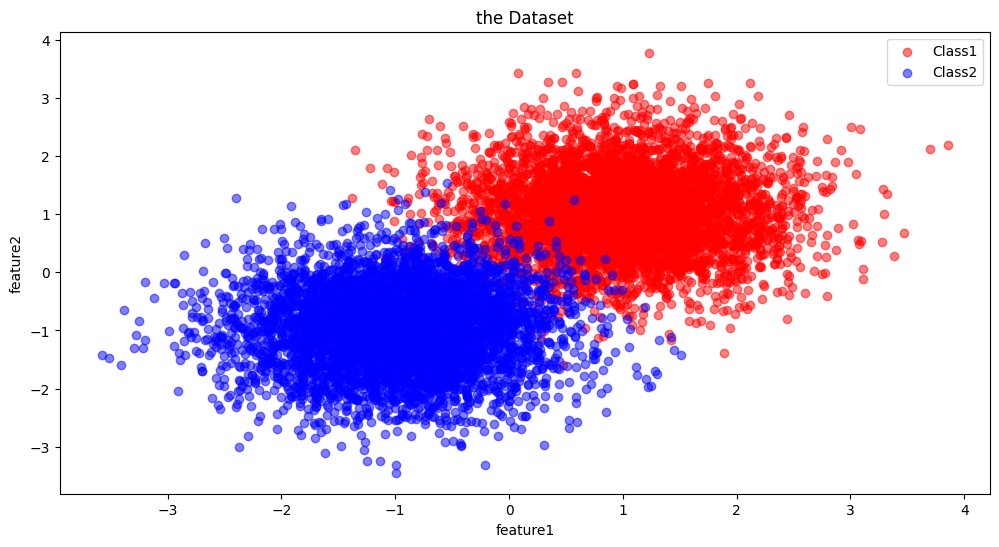

In [3]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

mean_class1=np.array([1,1])
mean_class2=np.array([-1,-1])
cov=np.array([[1,0],[0,1]])*0.5

X_class1=np.random.multivariate_normal(mean_class1,cov,(5000))
X_class2=np.random.multivariate_normal(mean_class2,cov,(5000))

y=np.concatenate([np.ones(5000),-np.ones(5000)])

X=np.vstack((X_class1,X_class2))
#caler=StandardScaler()
#X=scaler.fit(X)

plt.figure(figsize=(12,6))
plt.scatter(X[:4999,0],X[:4999,1],color='red',label='Class1',alpha=0.5)
plt.scatter(X[5000:,0],X[5000:,1],color='blue',label='Class2',alpha=0.5)
plt.legend()
plt.title("the Dataset")
plt.xlabel("feature1")
plt.ylabel("feature2")


## 2)

In [4]:
class Perceptron():
    def __init__(self,num_features):
        self.features_number=num_features
        self.weights=np.random.rand(self.features_number+1)#for bias that the input of that is one 
        self.cost=[]

    def activation(self,X):
        return np.where(X>0,1,-1)
    def net_input(self,X):
        return np.dot(X,self.weights[1:])+self.weights[0]
    def predict(self,X):
        return self.activation(self.net_input(X))
    def train(self,X,y,iter=50,LR=0.1):
        for i in range(iter):
            errors=y-self.predict(X)
            for i in range(len(errors)):
                self.weights[1:]+=LR*errors[i]*X[i,:]
                self.weights[0]+=LR*errors[i]
            self.cost.append(abs(errors.mean(axis=0)))

        return self
    
class Adaline():
    def __init__(self,num_features):
        self.features_number=num_features
        self.weights=np.random.rand(self.features_number+1)*0.1#for bias that the input of that is one 
        self.cost=[]

    def activation(self,X):
        return np.where(X>0,1,-1)
    def net_input(self,X):
        return np.dot(X,self.weights[1:])+self.weights[0]
    def predict(self,X):
        return self.activation(self.net_input(X))
    def train(self,X,y,iter=50,LR=0.1):
        for i in range(iter):
            errors=y-self.net_input(X)
            self.weights[1:]+=LR*np.dot(X.T,errors)
            self.weights[0]+=LR*errors.sum()
            self.cost.append(np.dot(errors.T,errors)/2)

        return self   



## part 3)

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Cross-validation setup
n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Storage for results
perceptron_models=[]
adaline_models=[]
perceptron_costs = []
adaline_costs = []
perceptron_scores = []
adaline_scores = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train Perceptron
    perceptron = Perceptron(2)
    result_perceptron = perceptron.train(X_train, y_train, iter=50, LR=0.01)
    perceptron_models.append(result_perceptron)
    perceptron_costs.append(result_perceptron.cost)
    
    # Evaluate Perceptron
    y_pred = perceptron.predict(X_test)
    perceptron_scores.append({
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    })

    # Train Adaline
    adaline = Adaline(2)
    result_adaline = adaline.train(X_train, y_train, iter=50, LR=0.00001)
    adaline_models.append(result_adaline)
    adaline_costs.append(result_adaline.cost)

    # Evaluate Adaline
    y_pred = adaline.predict(X_test)
    adaline_scores.append({
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    })


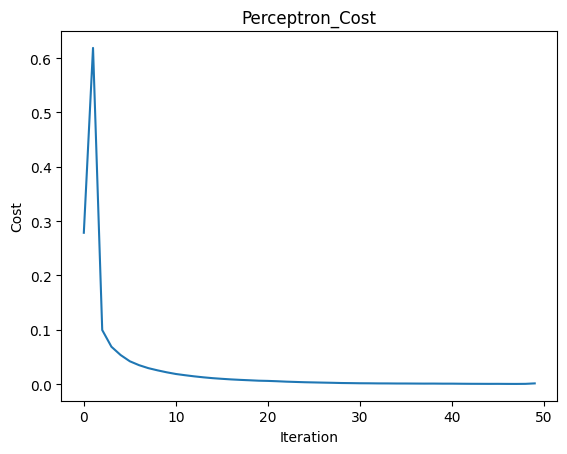

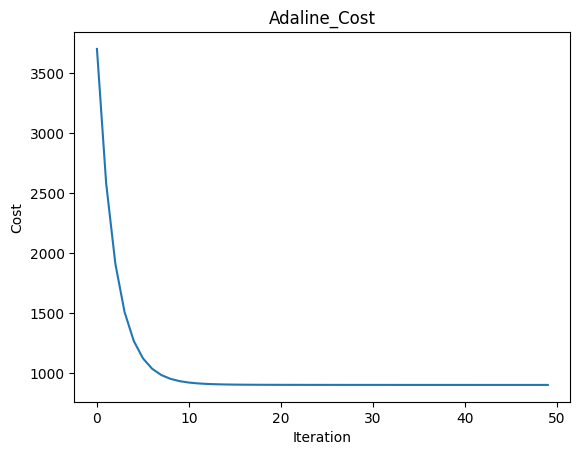

The step that the cost is converged for Perceptron is: 37
The step that the cost is converged for Adaline is: 22
Perceptron average scores: {'accuracy': 0.9589, 'precision': 0.9783, 'recall': 0.9394, 'f1': 0.9535}
Adaline average scores: {'accuracy': 0.9783, 'precision': 0.9788, 'recall': 0.9778, 'f1': 0.9783}


In [21]:
perceptron_cost_mean=np.mean(perceptron_costs,axis=0)
adaline_cost_mean=np.mean(adaline_costs,axis=0)

# Plot Perceptron cost
plt.figure()
plt.title("Perceptron_Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.plot(perceptron_cost_mean)
plt.show()

# Plot Adaline cost
plt.figure()
plt.title("Adaline_Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.plot(adaline_cost_mean)
plt.show()

# Print convergence step
for i in range(3, len(perceptron_cost_mean)):
    if (perceptron_cost_mean[i] - perceptron_cost_mean[i+1]) / np.mean(perceptron_cost_mean[-10:]) < 0.0001:
        print("The step that the cost is converged for Perceptron is:", i)
        break

for i in range(3, len(adaline_cost_mean)):
    if (adaline_cost_mean[i] - adaline_cost_mean[i+1]) / np.mean(adaline_cost_mean[-10:]) < 0.0001:
        print("The step that the cost is converged for Adaline is:", i)
        break

# Aggregate and print performance metrics
def average_scores(scores):
    avg_scores = {}
    for key in scores[0]:
        avg_scores[key] = round(np.mean([score[key] for score in scores]),4)
    return avg_scores

print("Perceptron average scores:", average_scores(perceptron_scores))
print("Adaline average scores:", average_scores(adaline_scores))

## Apendix

In [5]:
perceptron_models

NameError: name 'perceptron_models' is not defined

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

from matplotlib.colors import ListedColormap

perceptron_scores['accuracy']

""" Function to color the deciosion regions """
def plot_decision_regions(X, y, classifier, resolution = 0.02):

	# setup marker generator and color map

	markers = ('s', 'x', 'o', '^', 'v')
	colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
	cmap = ListedColormap(colors[ : len(np.unique(y))])

	# plot the decision surface

	x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
	x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
	xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
		np.arange(x2_min, x2_max, resolution))

	z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
	Z = z.reshape(xx1.shape)

	plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
	plt.xlim(xx1.min(), xx1.max())
	plt.ylim(xx2.min(), xx2.max())

	# plot class samples

	for idx, cl in enumerate(np.unique(y)):
		plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
			alpha = 0.8, c = cmap(idx), marker = markers[idx],
			label = cl)


/tmp/ipykernel_5944/3373862752.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],


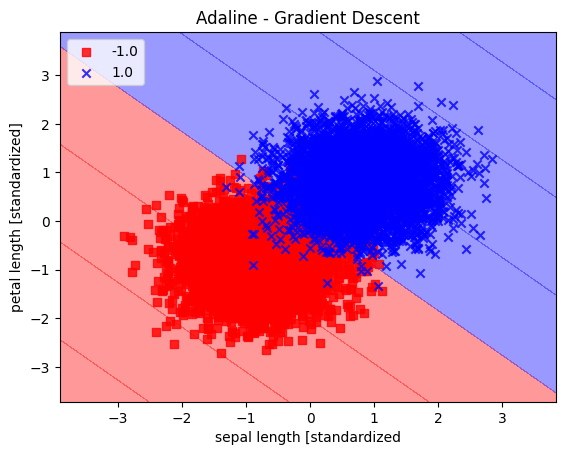

In [79]:
# Plot the decision boundary
plot_decision_regions(X, y, classifier = adaline)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()

/tmp/ipykernel_5944/3373862752.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],


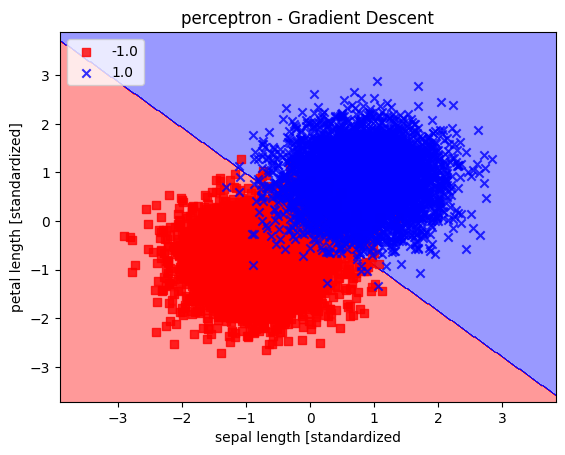

In [78]:
# Plot the decision boundary
plot_decision_regions(X, y, classifier = perceptron)
plt.title('perceptron - Gradient Descent')
plt.xlabel('sepal length [standardized')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()